In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer as rt
from stop_words import get_stop_words
import re

sns.set()

In [34]:
stop_words = get_stop_words('ru')
for letter in range(1072,1104):
        stop_words.append(chr(letter))

stop_words = set(stop_words)
deleter_punct = rt('\w+')

In [3]:
df = pd.read_csv('/Users/tonleon/Downloads/whole_table_with_lemm.csv', sep = '\t')

In [4]:
df

,Unnamed: 0,notes,notes\n,dates,id,author
0,0,Воскресенье. \nВчера приехал Слава навестит...,воскресение. \nвчера приезжать слава навеща...,0/0/0,2950,Василий Сергеевич Савельев
1,1,"Ночью мы достигли банки Антон-Дорн, в Датском ...","ночь мы достигать банка антон-дорн, в датский ...",0/0/0,2268,Олег Владимирович Амитров
2,2,Суббота. Москва. Еду в Селище.,суббота. москва. ехать в селище.\n,0/12/21,795,Сергей Иванович Танеев
3,3,18 Августа Его Королевское Величество отправил...,18 август его королевский величество отправлят...,1609/8/18,1081,Самуил Бельский
4,4,"На следующий день, 19 Августа, прибыл в Остров...","на следующий день, 19 август, прибывать в остр...",1609/8/19,1081,Самуил Бельский
...,...,...,...,...,...,...
384521,384521,"Вся моя личная жизнь является чудом Божиим, вс...","весь мой личный жизнь являться чудо божий, вес...",2018/6/3,2378,Александр Михайлович Чугунов
384522,384522,"Может быть, то место, где я сейчас нахожусь, г...","мочь быть, то место, где я сейчас находиться, ...",2018/6/12,2378,Александр Михайлович Чугунов
384523,384523,"Если взглянуть на мою жизнь, прожитые годы, то...","если взглядывать на мой жизнь, проживать год, ...",2018/6/13,2378,Александр Михайлович Чугунов
384524,384524,Вся моя жизнь после ухода из отеческого дома в...,весь мой жизнь после уход из отеческий дом в 1...,2018/6/17,2378,Александр Михайлович Чугунов


In [28]:
df['year'] = df['dates'].apply(lambda x: x[:x.find('/')])

In [29]:
def find_century(df, century, year_column_name='year'):
    return df[df[year_column_name].apply(lambda x: int(x[:2]) + 1 == century)]

In [40]:
def preprocessing(lemmas):
    diaries = []
    for trial in lemmas:
        trial = deleter_punct.tokenize(trial)
        without_punct_and_stop = []
        for word in trial:
            if word not in stop_words:
                without_punct_and_stop.append(word)
        text = ' '.join(without_punct_and_stop)
        text = re.sub('id', '', text)
        text = re.sub('com', '', text)
        text = re.sub('[0-9]+', '', text)
        diaries.append(text)
    return ' '.join(diaries)

In [50]:
xix = find_century(df, 20)

In [52]:
for year in range(1900, 1919):
    lemmas_xix = xix[xix['year'] == str(year)]['notes\n']
    notes = preprocessing(lemmas_xix)
    
    f = open('/Users/tonleon/Desktop/mallet-2.0.8/Diaries/Diary-{}.txt'.format(year), 'w')
    f.write(notes)
    f.close()
    

## БАЗА

In [53]:
def counting_words(list_of_words):
    dict_with_quantity = {}
    for word in list_of_words:
        if word in dict_with_quantity:
            dict_with_quantity[word] +=1
        else:
            dict_with_quantity[word]=1
    return dict_with_quantity

In [54]:
list_of_words = notes.split()
dict_freq = counting_words(list_of_words)

In [58]:
dict_with_counted_words = {key: value for key, value in sorted(dict_freq.items(), key=lambda item: item[1], reverse=True)}
dict_for_dataframe = [[word, num] for word, num in dict_with_counted_words.items()]

In [59]:
def count_word_list_to_pandas(dict_for_dataframe):
    table_counted_words = pd.DataFrame(dict_for_dataframe, columns=['Слово', 'Частотность'])
    table_counted_words.to_csv('Dictionary.tsv', sep='\t')
    return table_counted_words 

In [80]:
def visualization(x, index=30):
    words = []
    numbers = []
    for data in x:
        words.append(data[0])
        numbers.append(data[1])
    plt.figure(figsize = (30,10))    
    plt.scatter(words[:index], numbers[:index])
    plt.title('Самые частотные слова', fontsize=50)
    plt.ylabel('Количество', fontsize=30)
    plt.xlabel('Слова', fontsize=30)
    plt.tight_layout()
    plt.xticks(rotation=90)

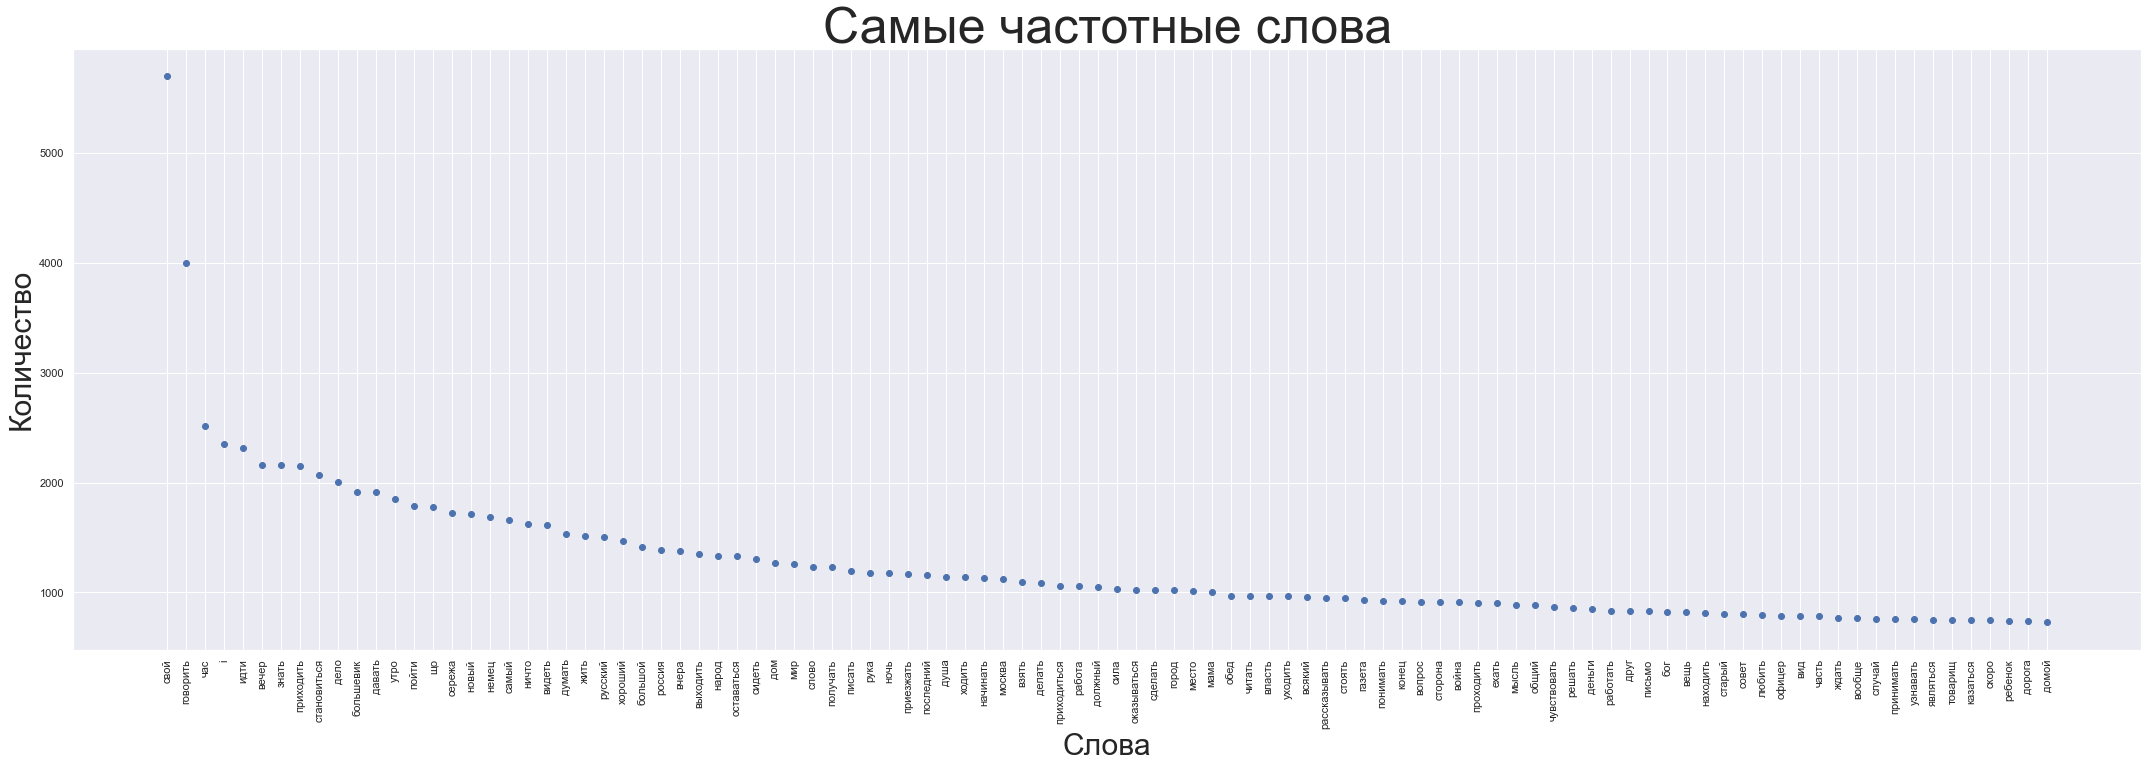

In [81]:
visualization(dict_for_dataframe, index=100)

In [220]:
topics = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/topics_in_docs.csv', header=None, index_col=None, sep = '\t' )

In [221]:
topics[1] = topics[1].apply(lambda x: x[-8: -4])

In [222]:
topics = topics.drop(0, axis = 1)

In [223]:
topics

,1,2,3,4,5,6,7,8,9,10,11
0,1915,0.241029,6.115524e-07,1.932066e-03,2.706466e-01,9.471565e-03,4.104950e-02,0.219896,0.212297,0.003667,1.135712e-05
1,1901,0.365547,6.954098e-06,6.716318e-07,5.395392e-05,9.585544e-07,8.763367e-07,0.067020,0.153148,0.003179,4.110429e-01
2,1900,0.366805,4.649765e-05,5.180945e-05,8.600943e-07,2.366284e-05,1.202226e-04,0.066575,0.142855,0.002980,4.205411e-01
3,1914,0.230626,4.892030e-07,2.799146e-03,3.057766e-01,3.150983e-02,1.774545e-03,0.192562,0.233047,0.001791,1.126446e-04
4,1902,0.322404,8.052303e-03,1.660346e-05,3.740480e-04,8.668983e-07,1.291141e-03,0.080164,0.144593,0.006650,4.364541e-01
5,1916,0.256755,6.271868e-06,3.278156e-07,4.713066e-02,8.925407e-04,2.562469e-01,0.216090,0.212964,0.008973,9.419530e-04
6,1917,0.220801,3.936048e-04,1.120880e-02,3.155480e-03,2.906432e-07,2.728088e-01,0.163961,0.327117,0.000553,5.964028e-07
7,1903,0.307111,1.820183e-02,6.098236e-07,1.344462e-03,2.257046e-04,2.259845e-03,0.092104,0.157962,0.029915,3.908761e-01
8,1907,0.342081,2.715063e-01,2.104973e-03,4.265796e-06,1.858586e-02,4.813600e-03,0.109794,0.231360,0.001253,1.849757e-02
9,1913,0.300670,1.915560e-03,5.153377e-03,2.897020e-02,3.007334e-01,6.975500e-07,0.170872,0.189730,0.000001,1.953827e-03


In [224]:
topics = topics.rename(columns = {1: 'year'})
topics = topics.rename(columns = {i + 1 : i for i in range(1, 11)})
topics = topics.sort_values(by=['year'])
topics

,year,1,2,3,4,5,6,7,8,9,10
2,1900,0.366805,4.649765e-05,5.180945e-05,8.600943e-07,2.366284e-05,1.202226e-04,0.066575,0.142855,0.002980,4.205411e-01
1,1901,0.365547,6.954098e-06,6.716318e-07,5.395392e-05,9.585544e-07,8.763367e-07,0.067020,0.153148,0.003179,4.110429e-01
4,1902,0.322404,8.052303e-03,1.660346e-05,3.740480e-04,8.668983e-07,1.291141e-03,0.080164,0.144593,0.006650,4.364541e-01
7,1903,0.307111,1.820183e-02,6.098236e-07,1.344462e-03,2.257046e-04,2.259845e-03,0.092104,0.157962,0.029915,3.908761e-01
13,1904,0.169250,4.504346e-07,2.795134e-06,1.794464e-05,4.079681e-07,1.233278e-04,0.089193,0.168626,0.550153,2.263206e-02
14,1905,0.244347,4.717856e-02,4.541098e-07,6.031315e-07,4.634405e-06,3.596234e-03,0.081553,0.334693,0.226411,6.221549e-02
11,1906,0.333565,2.310737e-01,5.436448e-07,7.220485e-07,7.758911e-07,7.593377e-03,0.083125,0.268974,0.016489,5.917763e-02
8,1907,0.342081,2.715063e-01,2.104973e-03,4.265796e-06,1.858586e-02,4.813600e-03,0.109794,0.231360,0.001253,1.849757e-02
16,1908,0.326716,2.651615e-01,8.296227e-05,1.510870e-03,2.956762e-02,5.113799e-07,0.164506,0.170948,0.007177,3.432977e-02
17,1909,0.307468,2.263227e-01,4.712984e-03,1.848963e-03,1.029989e-01,5.334876e-07,0.173645,0.147091,0.005973,2.993843e-02


In [191]:
topics.iloc[0, 1:].sum()

1.0000000000000002

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

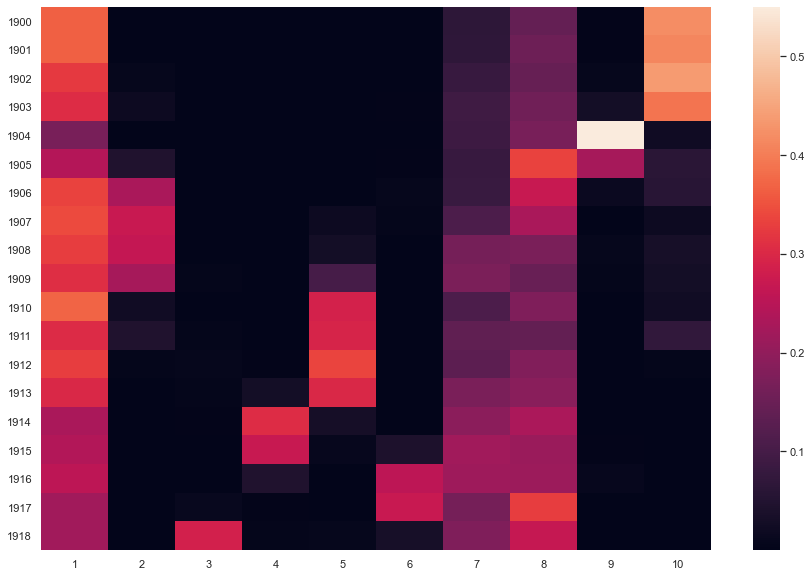

In [227]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns

plt.figure(figsize = (15,10))  
Index= [i for i in range(1, 11)]
Cols = list(topics['year'])

sns.heatmap(topics.iloc[:, 1:], xticklabels=Index, yticklabels=Cols)
plt.yticks(rotation=0) 

In [129]:
name_of_topics = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/output_keys.csv', header=None, index_col=None, sep = '\t' )

In [130]:
name_of_topics

,0,1,2
0,0,"2,58744",приезжать письмо приходить читать получать ста...
1,1,"0,17951",театр министр артист дума пьеса корпус государ...
2,2,"0,11392",большевик сережа немец власть мама він революц...
3,3,"0,1513",немец штаб армия полк лодка солдат офицер ране...
4,4,"0,16258",лев николаевич театр урок письмо милый софья п...
5,5,"0,14864",солдат фронт армия правительство офицер штаб п...
6,6,"1,41287",высокий военный общество начинать рубль ехать ...
7,7,"1,96486",вчера становиться оказываться газета скоро рас...
8,8,"0,21829",японец генерал японский полк офицер батарея сн...
9,9,"0,33362",театр церковь просить государь пьеса письмо ар...


In [131]:
topic_weights = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/topic_weights.csv', header=None, index_col=None, sep = '\t' )

In [152]:
highest_freq = topic_weights.groupby(0)[2].nlargest(20)

In [164]:
topic_weights.iloc[highest_freq[0].index][[2, 1]]

,2,1
113,11368.036807,приезжать
388,10170.036807,письмо
11,10157.036807,приходить
1018,9577.036807,читать
248,9386.036807,получать
255,7042.036807,становиться
2113,6993.036807,просить
58,6696.036807,спрашивать
340,6628.036807,бог
1004,6485.036807,написать


100.0

In [161]:
pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/most_freq_words/topic_1_most_freq_words.csv')

,Unnamed: 0,0,1,2
0,158053,1,театр,3249.036807
1,166158,1,министр,1576.036807
2,158694,1,артист,1446.036807
3,161925,1,дума,1443.036807
4,157979,1,пьеса,1360.036807
5,158332,1,корпус,1221.036807
6,160711,1,государь,1086.036807
7,160064,1,сережа,1054.036807
8,165544,1,присутствовать,1026.036807
9,158054,1,опера,983.036807


In [166]:
for i in range(0, 10):
    cur_weight = topic_weights.iloc[highest_freq[i].index]
    cur_weight[2] = cur_weight[2].apply(lambda x: int(x))
    cur_weight = cur_weight[[2, 1]].to_csv('/Users/tonleon/Desktop/mallet-2.0.8/most_freq_words/topic_{}_most_freq_words.csv'.format(i), index=False)


<ipython-input-166-933523e2a86e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_weight[2] = cur_weight[2].apply(lambda x: int(x))


In [133]:
topic_weights

,0,1,2
0,0,местечко,0.036807
1,0,эсцергален,0.036807
2,0,сильный,0.036807
3,0,перестрелка,0.036807
4,0,тяжелый,0.036807
...,...,...,...
1579245,9,капустинский,0.036807
1579246,9,капюс,0.036807
1579247,9,entourer,0.036807
1579248,9,еонтье,0.036807
